In [12]:
import pandas as pd

passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')

passengers_df.head()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75
5,"CALDWELL, Master Alden Gates",1911.0,1992.0,0.833333,Male,2,lived,£29.00,29.00
6,"WEST, Miss Barbara Joyce",1911.0,2007.0,0.833333,Female,2,lived,£27 15s,27.75
7,"AKS, Master Philip",1911.0,1991.0,0.833333,Male,3,lived,£9 7s,9.35
8,"ALLISON, Master Hudson Trevor",1911.0,1929.0,0.916667,Male,1,lived,£151 16s,151.80
9,"NAKID, Miss Mariayam",1911.0,1912.0,1.000000,Female,3,lived,£15 14s 10d,15.74


In [13]:
passengers_df.tail()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
1347,"FLETCHER, Miss N.",NaN,NaN,NaN,Female,1,died,£1 10s,1.5
1348,"STEVENS, Mr George",NaN,NaN,NaN,Male,1,died,£1 10s,1.5
1349,"CARRUTHERS, Mr Francis",NaN,NaN,NaN,Male,1,died,NaN,NaN
1350,"COLLIS, Mr",NaN,NaN,NaN,Male,1,died,NaN,NaN
1351,"WILDING, Mr Edward",NaN,NaN,NaN,Male,1,died,NaN,NaN


In [4]:
# Margins = True will show the summary
contingency_table = pd.crosstab(passengers_df['Gender'], passengers_df['Lived_Died'], margins=True)

print(contingency_table)

Lived_Died  died  lived   All
Gender                       
Female       143    339   482
Male         709    161   870
All          852    500  1352


Text(0, 0.5, 'Count')

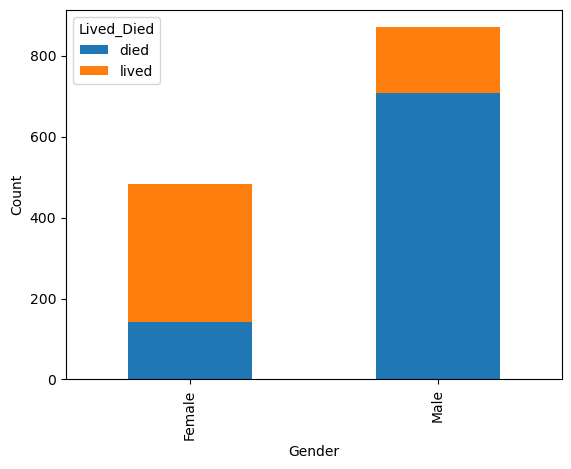

In [9]:
# Task: Create a stacked bar char showing the number of passenger by gender that lived or died
import matplotlib.pyplot as plt
# exclude the last column and row (summary info)

# For plotting, do not include the margins=True
contingency_table = pd.crosstab(passengers_df['Gender'], passengers_df['Lived_Died'])
contingency_table.plot(kind='bar', stacked=True)
plt.ylabel('Count')

In [11]:
from scipy import stats   # for chi2_contingency

print(stats.chi2_contingency(contingency_table)[0:3])

# you get 3 values back:
# 1) Chi-Squared: The higher the chi-squared statistics, the less likelihood that the observed values were the result of pure change
# 2) Target P-value
# 3) Degrees of freedom: 1 degree of freedom. (r rows -1) * (r columns -1) = 1

(355.24355436145913, 3.0570688722545846e-79, 1)


## Chi-Square Example: Was Age relevant?

In [16]:
# Check the age column. It is already fixed for the age at the time of incident

# What about null values?

# Create the bins
passengers_df['age_bins'] = pd.cut(x=passengers_df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

contingency_table = pd.crosstab(passengers_df['age_bins'], passengers_df['Lived_Died'])
print(contingency_table)
print(f'Chi2-Stats {stats.chi2_contingency(contingency_table)[0:3]}')


Lived_Died  died  lived
age_bins               
(0, 10]       46     54
(10, 20]     156     71
(20, 30]     286    166
(30, 40]     158    107
(40, 50]     111     64
(50, 60]      40     30
(60, 70]      27      7
(70, 80]       5      0
Chi2-Stats (24.465546982751874, 0.0009433264132943263, 7)


C:\Users\hvalle\AppData\Local\Temp\ipykernel_16924\298969475.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  passengers_df.groupby(['age_bins', 'Lived_Died']).size().unstack().plot(kind='bar',stacked=False)


Text(0.5, 1.0, 'Histogram of Age Ranges')

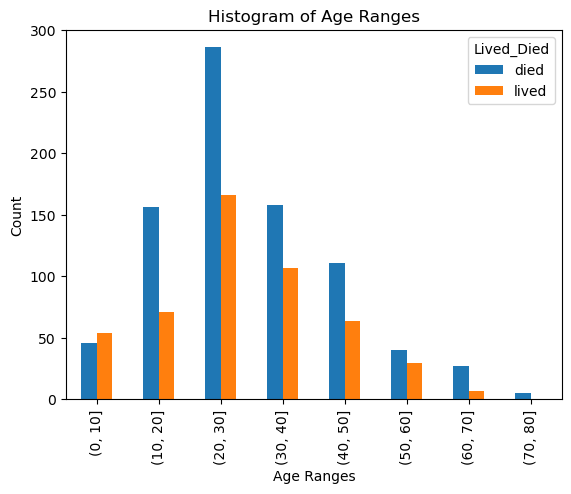

In [18]:
passengers_df.groupby(['age_bins', 'Lived_Died']).size().unstack().plot(kind='bar',stacked=False)
plt.ylabel('Count')
plt.xlabel('Age Ranges')
plt.title('Histogram of Age Ranges')


In [ ]:
# Create a heatmap
passengers_df['age_bins'] = pd.cut(x=passengers_df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

# Use a pivottable